In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import pickle 



In [2]:
# تحميل البيانات
df = pd.read_csv("asthma_disease_data.csv")

In [3]:
# --- تنظيف البيانات ---
df.dropna(inplace=True)  # إزالة القيم الفارغة
df = df.select_dtypes(include=[np.number])  # الاحتفاظ بالبيانات الرقمية فقط


In [4]:
# --- Feature Importance باستخدام RandomForest ---
X = df.drop(columns=["Diagnosis"])  # الميزات
y = df["Diagnosis"]  # المتغير المستهدف




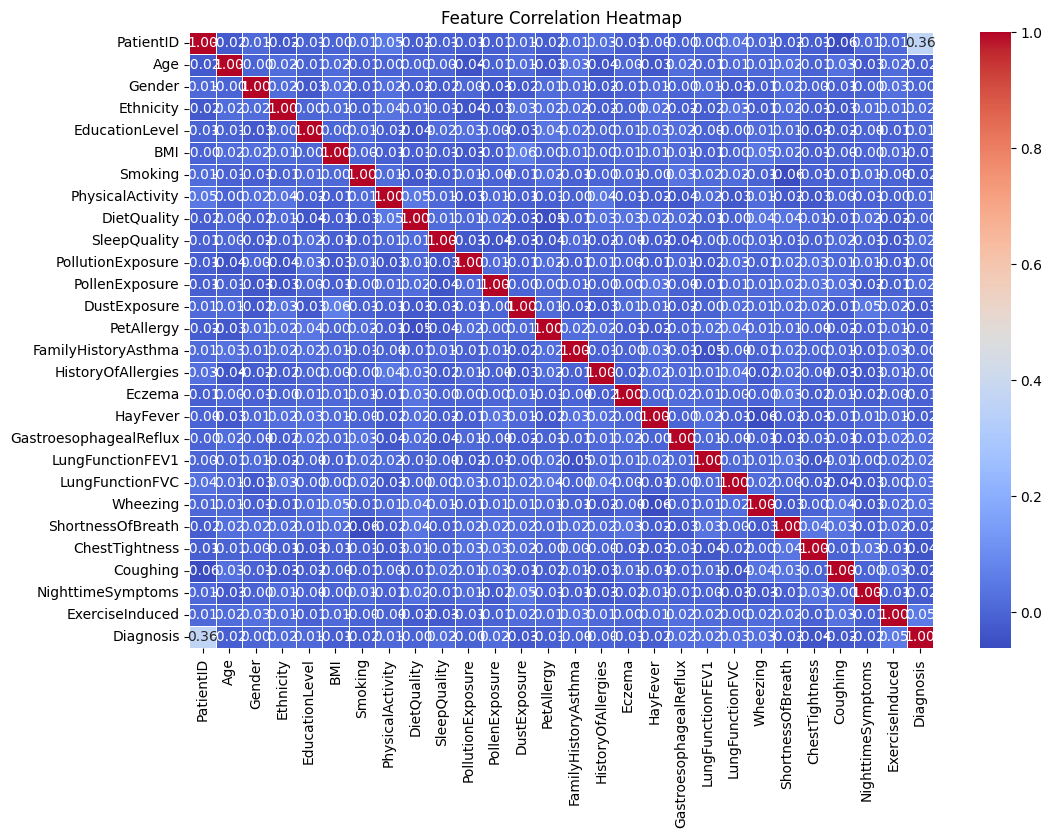

In [5]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [6]:
# --- Feature Importance باستخدام RandomForest ---
X = df.drop(columns=["Diagnosis"])  # الميزات
y = df["Diagnosis"]  # المتغير المستهدف

In [7]:
# تحويل المتغير المستهدف إذا كان غير رقمي
if y.dtype == "O":
    y = LabelEncoder().fit_transform(y)
    

In [8]:
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# --- Predictive Power ---
correlations = df.corr()["Diagnosis"].drop("Diagnosis").sort_values(ascending=False)
print("Predictive Power of Features:\n", correlations)

Predictive Power of Features:
 PatientID                 0.364879
ExerciseInduced           0.053956
LungFunctionFVC           0.029629
Wheezing                  0.027197
LungFunctionFEV1          0.023336
GastroesophagealReflux    0.022770
SleepQuality              0.018022
Ethnicity                 0.017124
PollenExposure            0.015099
EducationLevel            0.008185
PhysicalActivity          0.005066
Gender                    0.003128
FamilyHistoryAsthma      -0.001334
HistoryOfAllergies       -0.001951
DietQuality              -0.003149
PollutionExposure        -0.004535
Eczema                   -0.008592
BMI                      -0.012522
PetAllergy               -0.013078
Age                      -0.015111
ShortnessOfBreath        -0.015281
HayFever                 -0.019141
Smoking                  -0.019321
NighttimeSymptoms        -0.021965
Coughing                 -0.024193
DustExposure             -0.025972
ChestTightness           -0.039278
Name: Diagnosis, dtype: 

In [10]:
# --- Predictive Power ---
correlations = df.corr()["Diagnosis"].drop("Diagnosis").sort_values(ascending=False)
print("Predictive Power of Features:\n", correlations)


Predictive Power of Features:
 PatientID                 0.364879
ExerciseInduced           0.053956
LungFunctionFVC           0.029629
Wheezing                  0.027197
LungFunctionFEV1          0.023336
GastroesophagealReflux    0.022770
SleepQuality              0.018022
Ethnicity                 0.017124
PollenExposure            0.015099
EducationLevel            0.008185
PhysicalActivity          0.005066
Gender                    0.003128
FamilyHistoryAsthma      -0.001334
HistoryOfAllergies       -0.001951
DietQuality              -0.003149
PollutionExposure        -0.004535
Eczema                   -0.008592
BMI                      -0.012522
PetAllergy               -0.013078
Age                      -0.015111
ShortnessOfBreath        -0.015281
HayFever                 -0.019141
Smoking                  -0.019321
NighttimeSymptoms        -0.021965
Coughing                 -0.024193
DustExposure             -0.025972
ChestTightness           -0.039278
Name: Diagnosis, dtype: 

In [11]:
# استبعاد الميزات غير المفيدة وإضافة ميزات أكثر أهمية
features_to_plot = ["LungFunctionFVC", "BMI", "PhysicalActivity", "Wheezing", "LungFunctionFEV1", "Diagnosis"]
df_filtered = df[features_to_plot]


In [13]:
# sns.pairplot(df[selected_features + ["Diagnosis"]], hue="Diagnosis", plot_kws={'alpha': 0.6})
# plt.show()



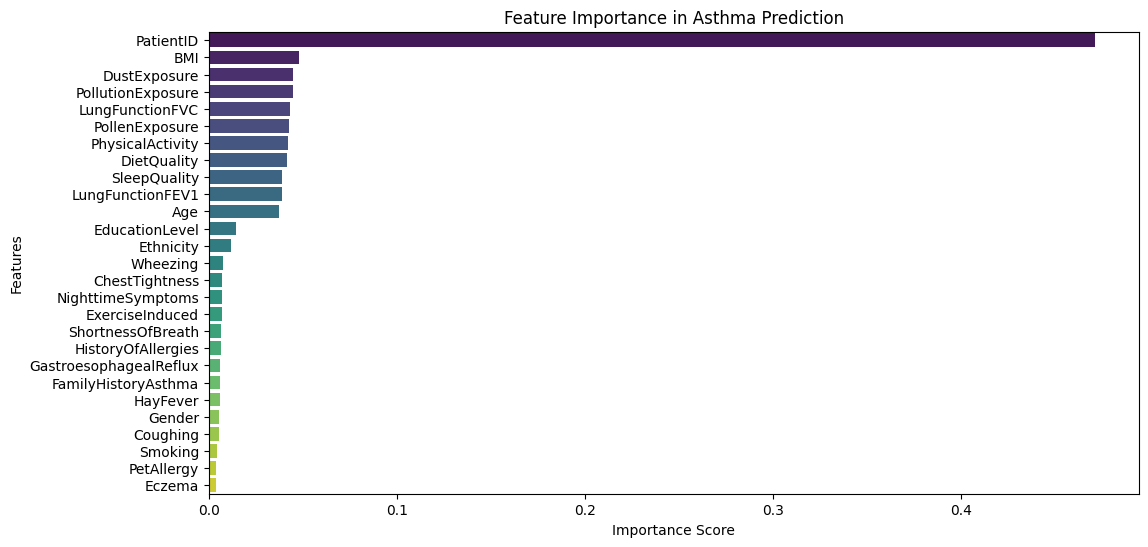

In [14]:
#Feature Importance باستخدام Random Forest

# تجهيز البيانات
X = df.drop(columns=['Diagnosis'])  # حذف الـ target
y = df['Diagnosis']

# تدريب نموذج Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# استخراج الأهمية
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

# رسم الـ Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], hue=feature_names[sorted_indices], palette="viridis", dodge=False)

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Asthma Prediction")
plt.show()


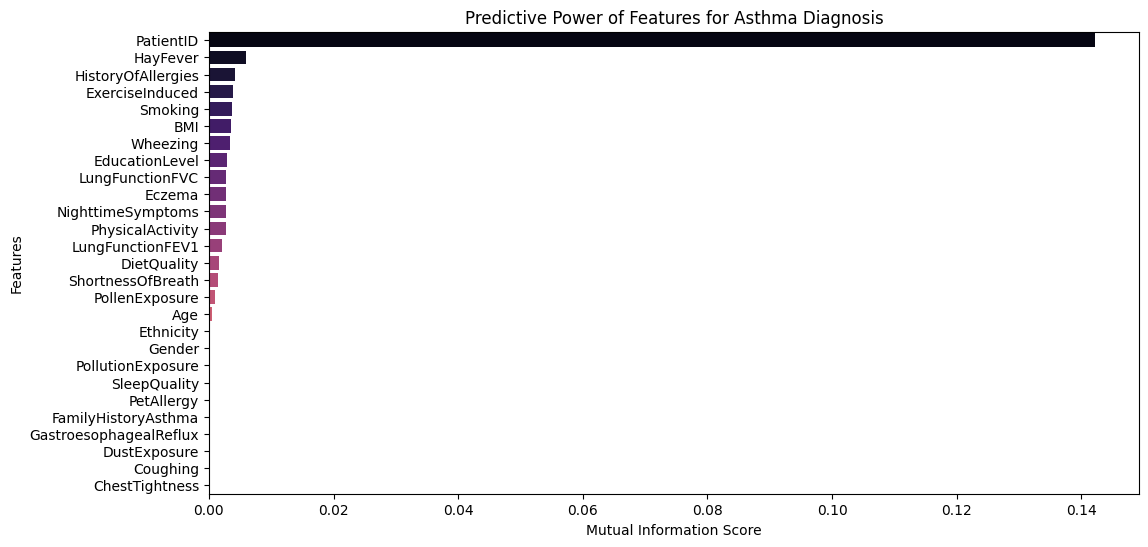

In [15]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# حساب الـ mutual information بين كل feature والـ target
mi_scores = mutual_info_classif(X_train, y_train)

# تخزين النتائج في Series عشان نستخدمها في الرسم
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)



plt.figure(figsize=(12, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, hue=mi_series.index, palette="magma", dodge=False, legend=False)

plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Predictive Power of Features for Asthma Diagnosis")
plt.show()


In [17]:
# SMOTE لتوازن البيانات
from imblearn.over_sampling import SMOTE
from collections import Counter

# إنشاء كائن SMOTE
smote = SMOTE(random_state=42)

# تطبيق SMOTE على البيانات
X_resampled, y_resampled = smote.fit_resample(X, y)

# طباعة التوزيع بعد إعادة التوازن
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({0: 2268, 1: 124})
Resampled dataset shape: Counter({0: 2268, 1: 2268})


d:\Programming\Python\DEPI-Data\DEPI-Data-Science-Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Programming\Python\DEPI-Data\DEPI-Data-Science-Project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\loaiw\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\loaiw\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\loaiw\AppData\Local\Programs\Python\

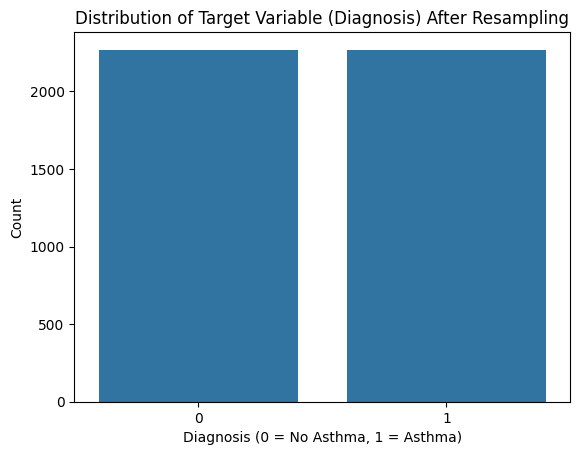

In [18]:
#توزيع المتغير الهدف (Diagnosis)
sns.countplot(x=y_resampled)
plt.title("Distribution of Target Variable (Diagnosis) After Resampling")
plt.xlabel("Diagnosis (0 = No Asthma, 1 = Asthma)")
plt.ylabel("Count")
plt.show()



In [ ]:
!pip install tensorflow


In [19]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(10,)))  # بدل input_dim
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 1. بناء الموديل
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 2. تجهيزه للتدريب
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. تدريبه
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9389 - loss: 35.0542 - val_accuracy: 0.9520 - val_loss: 1.1321
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8638 - loss: 1.3941 - val_accuracy: 0.9520 - val_loss: 1.0389
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8881 - loss: 1.5061 - val_accuracy: 0.9520 - val_loss: 1.6484
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9094 - loss: 1.2000 - val_accuracy: 0.1190 - val_loss: 1.2972
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8653 - loss: 0.4810 - val_accuracy: 0.9520 - val_loss: 0.9378
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 1.7853 - val_accuracy: 0.9520 - val_loss: 1.0208
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9248 - loss: 1.3992 - val_accuracy: 0.9520 - val_loss: 1.5533
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.8052 - val_accuracy: 0.9520 - val_loss

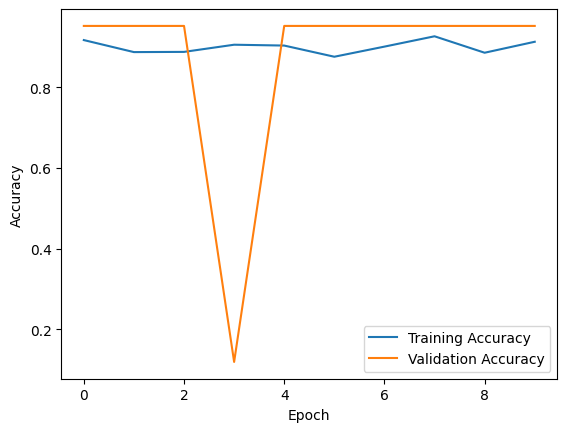

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.2732 
Test Accuracy: 0.9520


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


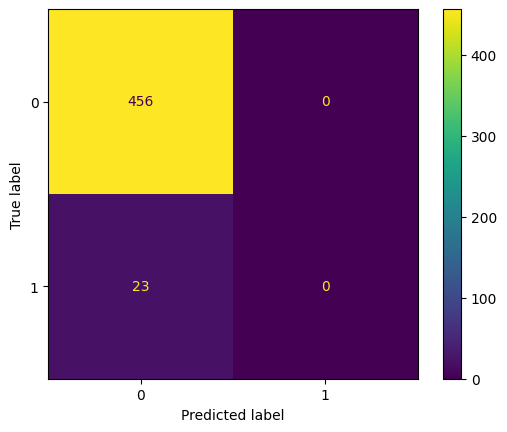

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


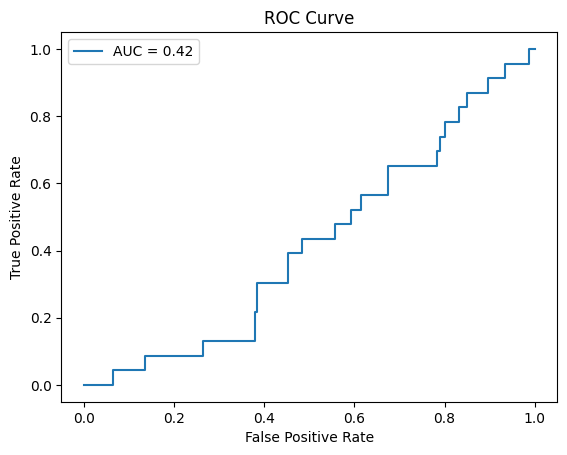

In [25]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [27]:
# حفظ الموديل بالصيغتين (HDF5 والـ Keras)
model.save("saved_model/asthma_diagnosis_model.h5")  # الصيغة القديمة
model.save("saved_model/asthma_diagnosis_model.keras")  # الصيغة الحديثة
with open('asthma.pkl', 'wb') as file:
    pickle.dump(model, file)
print("✅ Model saved successfully in both formats!")


✅ Model saved successfully in both formats!


In [ ]:
from tensorflow.keras.models import load_model

# تحميل الموديل المحفوظ
model = load_model("saved_model/asthma_diagnosis_model.h5")

# التأكد إن الموديل شغال
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,859 (7.27 KB)

 Trainable params: 1,857 (7.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9368 - loss: 0.2489  
Test Accuracy: 0.9478
